### Import Functions
This is tfidf version.  
*DO THIS NOTEBOOK ON MECAB ENV!!*

In [66]:
import get_features
from gensim.models import Word2Vec
gf = get_features.GetFeatures()
model = Word2Vec.load(r"make_corpus/jawiki.model")

### Train model

In [67]:
# Before doing under cell, DO THIS CELL
from pathlib import Path
import subprocess
Path("data/accuracy.txt").write_text("")

0

In [68]:
# BE CAREFULL
!del data\*.npy
!del data\*.txt

In [69]:
OLD_PATH = r"../ClassifyingOfPartyByTweets/"
NLP_PATH = r"D:\Programs\Python\env35\nlp\Scripts\python.exe"

def NLP(args):
    subprocess.call(NLP_PATH + " " + args)
    
def OLD(file):
    NLP(OLD_PATH+file)

In [48]:
OLD("train.py 1")

In [70]:
# DO CAREFULLY
i = 10
for i in range(1,i+1):
    OLD("clean.py")
    OLD("data/split_train_and_test.py")
    OLD("data/create_empty_db.py")
    OLD("data/insert_values_to_db.py")
    OLD("word2vec/transform_split.py")
    OLD("data/insert_standard_to_db.py")
    OLD("data/data_to_npz.py")
    print("OLD F OK",i)
    !python get_tf-idf.py
    print("tf-idf OK!",i)
    gf.main(model)
    print("features OK!",i)
    NLP("train.py " + str(i))
    print("train OK!",i)
    OLD("train.py " + str(i))
    print("OLD TRAIN",i)

OLD F OK 1
tf-idf OK! 1
features OK! 1
train OK! 1
OLD TRAIN 1
OLD F OK 2
tf-idf OK! 2
features OK! 2
train OK! 2
OLD TRAIN 2
OLD F OK 3
tf-idf OK! 3
features OK! 3
train OK! 3
OLD TRAIN 3
OLD F OK 4
tf-idf OK! 4
features OK! 4
train OK! 4
OLD TRAIN 4
OLD F OK 5
tf-idf OK! 5
features OK! 5
train OK! 5
OLD TRAIN 5
OLD F OK 6
tf-idf OK! 6
features OK! 6
train OK! 6
OLD TRAIN 6
OLD F OK 7
tf-idf OK! 7
features OK! 7
train OK! 7
OLD TRAIN 7
OLD F OK 8
tf-idf OK! 8
features OK! 8
train OK! 8
OLD TRAIN 8
OLD F OK 9
tf-idf OK! 9
features OK! 9
train OK! 9
OLD TRAIN 9
OLD F OK 10
tf-idf OK! 10
features OK! 10
train OK! 10
OLD TRAIN 10


In [37]:

OLD("train.py " + str(1))
print("OLD TRAIN")

OLD TRAIN


In [6]:
!python get_tf-idf.py

### Analyze Results (Average Comfusion Matrix)
DO THIS CELL ON NLP ENV!

Average Accuracy: 0.6284590929345036


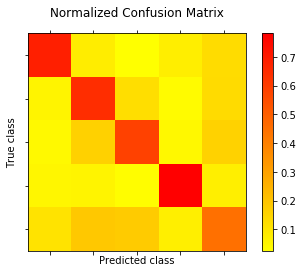

In [9]:
import csv

import numpy as np
import matplotlib.pyplot as plt

import train
t = train.Train()
politicians = t.get_politicians()

i = 10

accuracies = []
with open("data/accuracy.txt","r") as f:
    for l in f.readlines():
        accuracies.append(float(l))
print("Average Accuracy:",np.mean(accuracies))
        

cm = []
for i in range(1, i+1):
    cm.append(np.load("data/cm{0}.npy".format(i)))
cm = np.asarray(cm)
cm_a = np.mean(cm,axis=0)

fig = plt.figure()
ax = plt.subplot()
cax = ax.matshow(cm_a, interpolation="nearest", cmap="autumn_r")
fig.colorbar(cax)
ax.set_xticklabels([""]+politicians,fontsize=6)
ax.set_yticklabels([""]+politicians,fontsize=6)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

with open("data/cm.csv","w") as f:
    writer = csv.writer(f,delimiter=",")
    writer.writerows(cm_a)